# Chapter 2 Lab: Introduction to R (now in Python!)
 Please note that, the purpose of this file is *not* to demonstrate Python's basic functionalities (there are much more comprehensive guides, [like this](https://learnxinyminutes.com/docs/python3/)) but to mirror ISLR's lab in R as much as possible.
## Basic Commands

In [1]:
x = [1, 3, 2, 5]
print(x)
y = [1, 4, 3]
print(y)


[1, 3, 2, 5]
[1, 4, 3]


### Get the length of a variable

In [2]:
print(len(x))
print(len(y))


4
3


### Element-wise addition of two lists
#### Pure Python
 Use [map](https://docs.python.org/2/library/functions.html#map) with [operator.add](https://docs.python.org/2/library/operator.html#operator.add) ([source](https://stackoverflow.com/a/18713494/4173146)):

In [3]:
from operator import add
x = [1, 6, 2]
print(list(map(add, x, y)))


[2, 10, 5]


 or [zip](https://docs.python.org/2/library/functions.html#zip) with a list comprehension:

In [4]:
print([sum(i) for i in zip(x, y)])


[2, 10, 5]


#### Using NumPy (will be faster than pure Python) ([source](https://stackoverflow.com/a/18713494/4173146)):

In [5]:
import numpy as np
x2 = np.array([1, 6, 2])
y2 = np.array([1, 4, 3])
print(x2 + y2)


[ 2 10  5]


### List all the variables

In [6]:
def printvars():
   tmp = globals().copy()
   [print(k,'  :  ',v,' type:' , type(v)) for k,v in tmp.items() if not k.startswith('_') and k!='tmp' and k!='In' and k!='Out' and not hasattr(v, '__call__')]
printvars()


matplotlib   :   <module 'matplotlib' from 'C:\\Users\\a_izadeh\\Anaconda3\\lib\\site-packages\\matplotlib\\__init__.py'>  type: <class 'module'>
x   :   [1, 6, 2]  type: <class 'list'>
y   :   [1, 4, 3]  type: <class 'list'>
np   :   <module 'numpy' from 'C:\\Users\\a_izadeh\\Anaconda3\\lib\\site-packages\\numpy\\__init__.py'>  type: <class 'module'>
x2   :   [1 6 2]  type: <class 'numpy.ndarray'>
y2   :   [1 4 3]  type: <class 'numpy.ndarray'>


### Clear a variable's content

In [7]:
x = None
print(x)

None


### Delete a variable (its reference)

In [8]:
del y
print(y)

NameError: name 'y' is not defined

### Delete all varialbes ([source](https://stackoverflow.com/a/53415612/4173146))

In [9]:
for name in dir():
    if not name.startswith('_'):
        del globals()[name]

for name in dir():
    if not name.startswith('_'):
        del locals()[name]
print(x2)
print(y2)

NameError: name 'x2' is not defined

 or simply restart the interpreter.

### Declare matrices ([source](https://stackoverflow.com/questions/6667201/how-to-define-a-two-dimensional-array-in-python))
#### Pure Python

In [10]:
rowCount = 4
colCount = 3
mat = [[0 for x in range(colCount)] for x in range(rowCount)]
print(mat)

[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


 or a shorter version:

In [11]:
mat = [[0] * colCount for i in range(rowCount)]
print(mat)


[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0]]


 However, it is best to use numpy arrays to represent matrices.

In [12]:
import numpy
mat = numpy.zeros((rowCount, colCount))
print(mat)


[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


### The sqaure root of each element of a vector or matrix (numpy array)

In [13]:
import numpy as np
mat = [[16] * colCount for i in range(rowCount)]
mat = np.asarray(mat)
print(np.sqrt(mat))


[[4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]
 [4. 4. 4.]]


### Generate a vector of random normal variables
 Dimensions are provided as arguements to the numpy function.

 For random samples from a Normal distribution with mean *mu* and standard deviation *sigma*, use:
 `sigma * np.random.randn(...) + mu` according to the [documentation](https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.randn.html#numpy.random.randn)

In [14]:
import numpy as np
x = np.random.randn(50)
y = x + ( 0.1 * np.random.randn(50) + 50 )

 To compute the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), or simply correlation, between the two vectors:

In [15]:
print(np.corrcoef(x, y))


[[1.         0.99592504]
 [0.99592504 1.        ]]


 To set the seed for random number generation, in Python:

In [16]:
import random
random.seed(0)

 Or in numpy:

In [17]:
np.random.seed(0)
x = np.random.randn(50)
y = x + ( 0.1 * np.random.randn(50) + 50 )


### To compute the mean, variance, and standard deviation of a vector of numbers:

In [18]:
print(np.mean(x))
print(np.var(x))
print(np.std(x))
print(np.mean(y))
print(np.var(y))
print(np.std(y))


0.14055927231309787
1.2668018446943103
1.125522920554846
50.138464948188684
1.262768994078827
1.1237299471309052


## Graphics

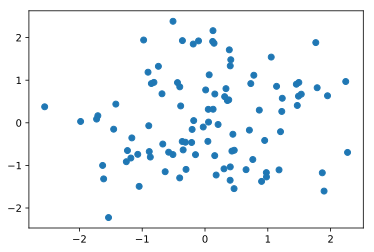

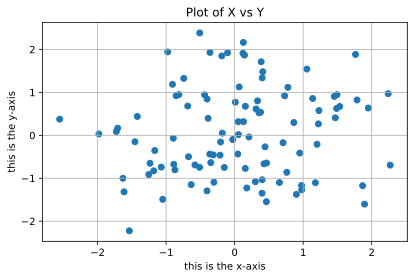

In [19]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
x = np.random.randn(100)
y = np.random.randn(100)

fig, ax = plt.subplots()
ax.scatter(x, y)
plt.show()

fig, ax = plt.subplots()
ax.set_xlabel(r'this is the x-axis')
ax.set_ylabel(r'this is the y-axis')
ax.set_title('Plot of X vs Y')
ax.grid(True)
fig.tight_layout()
ax.scatter(x, y)